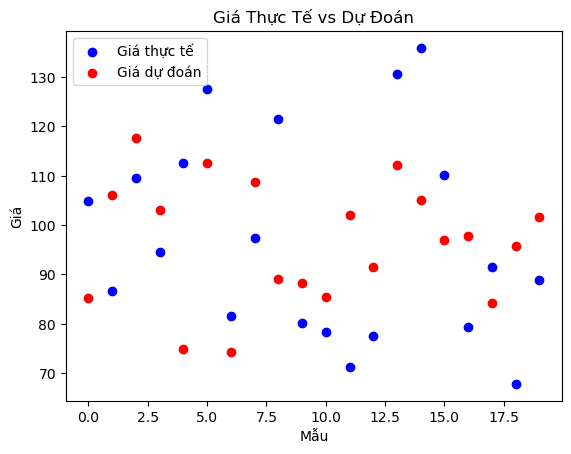

Giá dự đoán: 96.57
Giá dự đoán: 96.57


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Đọc dữ liệu
df = pd.read_csv('data_train.csv')

# Chuyển đổi dữ liệu
X = df[['Khối_lượng', 'Loại', 'Mùa']]
y = df['Giá']

# One-hot encoding cho cột 'Loại' và 'Mùa'
ct = ColumnTransformer([('encoder', OneHotEncoder(), ['Loại', 'Mùa'])], remainder='passthrough')
X = ct.fit_transform(X)

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Tạo và huấn luyện mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train, y_train)

# Dự đoán
y_pred = model.predict(X_test)

# Vẽ biểu đồ
plt.scatter(range(len(y_test)), y_test, color='blue', label='Giá thực tế')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Giá dự đoán')
plt.title('Giá Thực Tế vs Dự Đoán')
plt.xlabel('Mẫu')
plt.ylabel('Giá')
plt.legend()
plt.show()

# Hàm nhập dữ liệu mới
def du_doan_gia_moi(khoi_luong, loai, mua):
    # Tạo DataFrame cho dữ liệu mới
    data_moi = pd.DataFrame({'Khối_lượng': [khoi_luong], 'Loại': [loai], 'Mùa': [mua]})
    
    # Chuyển đổi dữ liệu mới
    X_new = ct.transform(data_moi)
    
    # Dự đoán giá
    gia_du_doan = model.predict(X_new)
    print(f"Giá dự đoán: {gia_du_doan[0]:.2f}")

# Ví dụ nhập dữ liệu mới
du_doan_gia_moi(5, 'Rau', 'Xuân')
# Ví dụ nhập dữ liệu mới
du_doan_gia_moi(5, 'Rau', 'Xuân')